# Lista de Exercícios de Estatística

1. Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido, pede-se:

    a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.  
    
   b) Em seguida, elabore a tabela de frequências para as faixas de renda acima.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
renda = {'renda': ['2.894,00','3.448,00','1.461,00','2.224,00','2.501,00','1.100,00','3.560,00','5.511,00','2.901,00','10.128,00',
                '1.855,00','3.161,00','8.630,00','6.201,00','4.130,00','2.736,00','4.448,00','2.150,00','4.595,00','5.561,00',
                 '2.800,00','9.538,00','2.000,00','3.226,00','1.900,00','7.665,00','3.890,00','6.590,00','1.241,00','1.720,00',
                 '2.556,00','4.730,00','4.745,00','8.550,00','3.860,00','11.320,00','6.125,00','5.606,00','3.250,00','1.500,00',
                 '9.216,00','4.999,00','3.900,00','7.000,00','3.508,00','1.130,00','4.121,00','2.601,00','2.901,00','4.871,00'
                ]}
df1 = pd.DataFrame(renda)

O valor é do tipo float, mas no formato original dos dados o python não reconhece, porque o ponto é utilizado como separador decimal, e não a vírgula

In [3]:
#converter para o tipo float 
df1['renda'] = df1['renda'].str.replace('.','',regex=False).str.replace(',','.',regex=False).astype(float)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   renda   50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [5]:
intervalo = [0, 2000, 4000, 6000, 8000, 10000, 12000]
rotulos = ['0-2.000','2.001-4.000','4.001-6.000','6.001-8.000','8.001-10.000','10.001-12.000']

In [6]:
df1['Faixa de Renda'] = pd.cut(df1['renda'], bins=intervalo, labels=rotulos, right=True, include_lowest=True)
#cut = é utilizado para separar dados numéricos em intervalos específicos
#bins = os limites dos intervalos
#labels = rótulos das categorias resultantes
#right = Indica se os intervalos devem incluir o valor à direita ou não (True <=, False <)
#include_lowest = define se o valor mais baixo será incluído no intervalo

In [7]:
df1.head(5)

,renda,Faixa de Renda
0,2894.0,2.001-4.000
1,3448.0,2.001-4.000
2,1461.0,0-2.000
3,2224.0,2.001-4.000
4,2501.0,2.001-4.000


In [8]:
faixa_renda = df1['Faixa de Renda'].value_counts().sort_index().reset_index()
#value_counts() = Conta quantas vezes cada faixa aparece na coluna. O resultado é uma Series com os rótulos como índice e as contagens como valores.
#sort_index() = Ordena a Series de acordo com o índice, ou seja, coloca as faixas de renda em ordem crescente.
#reset_index() = Transforma a Series resultante em um novo DataFrame

In [9]:
# Renomeando colunas
faixa_renda.columns = ['Faixa de Renda', 'Frequencia Absoluta']
faixa_renda

,Faixa de Renda,Frequencia Absoluta
0,0-2.000,9
1,2.001-4.000,19
2,4.001-6.000,11
3,6.001-8.000,5
4,8.001-10.000,4
5,10.001-12.000,2


In [10]:
# Frequência relativa (%)
total = faixa_renda['Frequencia Absoluta'].sum()
faixa_renda['Freq. Relativa (%)'] = (faixa_renda['Frequencia Absoluta'] / total * 100).round(2)

# Frequência absoluta acumulada 
faixa_renda['Freq. Abs. Acumulada'] = faixa_renda['Frequencia Absoluta'].cumsum()

# Frequência relativa acumulada (%)
faixa_renda['Freq. Rel. Acumulada (%)'] = faixa_renda['Freq. Relativa (%)'].cumsum().round(2)

In [11]:
faixa_renda

,Faixa de Renda,Frequencia Absoluta,Freq. Relativa (%),Freq. Abs. Acumulada,Freq. Rel. Acumulada (%)
0,0-2.000,9,18.0,9,18.0
1,2.001-4.000,19,38.0,28,56.0
2,4.001-6.000,11,22.0,39,78.0
3,6.001-8.000,5,10.0,44,88.0
4,8.001-10.000,4,8.0,48,96.0
5,10.001-12.000,2,4.0,50,100.0


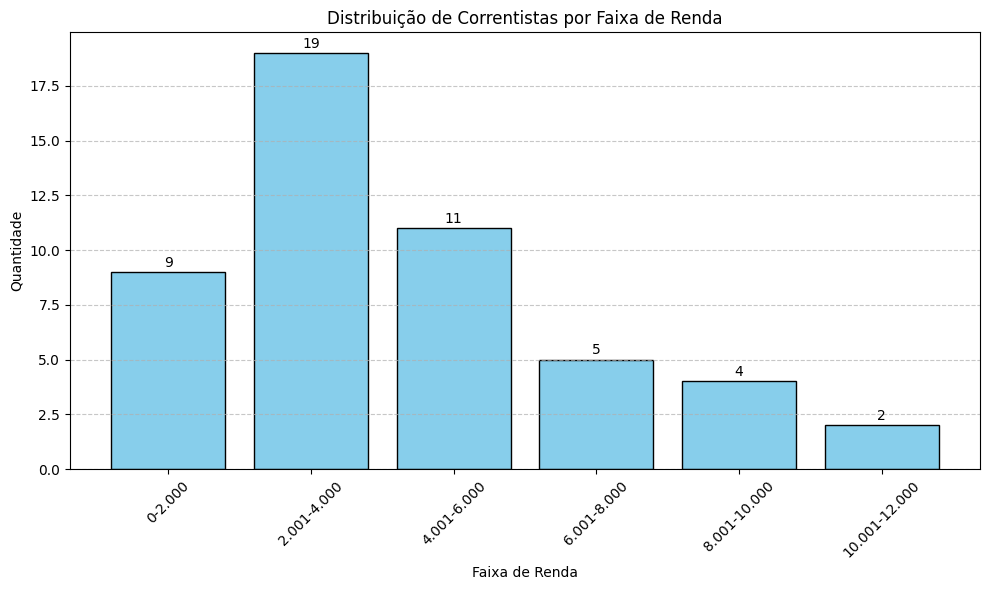

In [12]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de barras
bars = plt.bar(faixa_renda['Faixa de Renda'], faixa_renda['Frequencia Absoluta'], color='skyblue', edgecolor='black')

# Adiciona rótulos de dados no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,   # posição
             f'{int(height)}',                                  # texto (valor inteiro)
             ha='center', va='bottom', fontsize=10)

# Títulos e rótulos
plt.title('Distribuição de Correntistas por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.tight_layout()
plt.show()

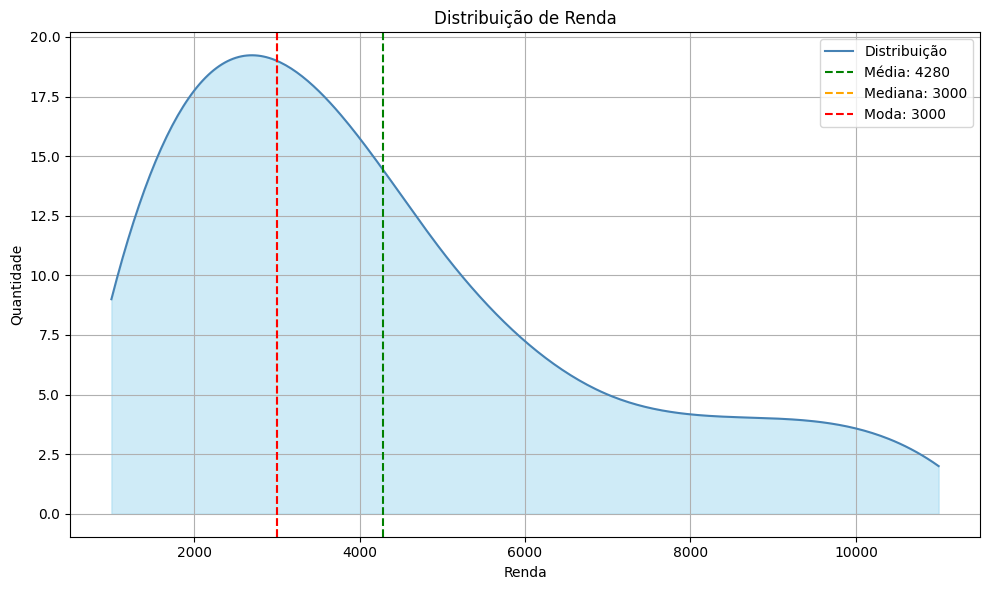

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

faixa_renda['Ponto Médio'] = faixa_renda['Faixa de Renda'].str.replace('.', '', regex=False) \
                                                            .str.replace(' a ', '-') \
                                                            .apply(lambda x: np.mean(list(map(int, x.split('-'))))

# Ponto médio das faixas
x = faixa_renda['Ponto Médio']
y = faixa_renda['Frequencia Absoluta']

# Gera pontos suaves para a curva (interpolação)
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # k=3 para spline cúbica
y_smooth = spl(x_new)

# Calcula média, mediana e moda como antes
media = np.average(x, weights=y)
mediana = faixa_renda.loc[faixa_renda['Freq. Abs. Acumulada'] >= y.sum()/2, 'Ponto Médio'].iloc[0]
moda = faixa_renda.loc[y.idxmax(), 'Ponto Médio']

# Plotando a curva
plt.figure(figsize=(10, 6))

# Preenchendo a área sob a curva
plt.fill_between(x_new, y_smooth, color='skyblue', alpha=0.4)

# Linha da curva por cima da área
plt.plot(x_new, y_smooth, color='steelblue', label='Distribuição')

# Linhas verticais de tendência central
plt.axvline(media, color='green', linestyle='--', label=f'Média: {media:.0f}')
plt.axvline(mediana, color='orange', linestyle='--', label=f'Mediana: {mediana:.0f}')
plt.axvline(moda, color='red', linestyle='--', label=f'Moda: {moda:.0f}')

# Estética do gráfico
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Um analista do mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas variáveis. Posteriormente, analise o coeficiente de correlação de Pearson entre os retornos.